In [1]:
!pip install -q datasets transformers nltk matplotlib seaborn pandas numpy tqdm sentencepiece sacrebleu rouge-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.5 MB/s eta 0:00:00


## Mount Google Drive:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Setup Paths & Ekstraksi Dataset:

In [3]:
import os

In [4]:
# Path ke file tar.gz di Drive:
drive_file = "/content/drive/MyDrive/liputan6_data.tar.gz"

In [5]:
# Buat folder untuk ekstraksi di Colab (bukan di Drive)
extract_path = "/content/data/dataset"
os.makedirs(extract_path, exist_ok = True)

In [6]:
# Copy dataset ke Colab dan ekstrak:
print("Copying and extracting dataset...")
!cp "{drive_file}" /content/data/
!tar -xzf /content/data/liputan6_data.tar.gz -C "{extract_path}"

Copying and extracting dataset...


In [7]:
# Cek hasil ekstraksi:
print("\nIsi folder hasil ekstraksi:")
!ls -l "{extract_path}/"


Isi folder hasil ekstraksi:
total 4
drwxr-xr-x 4 1001 1001 4096 Nov 30  2020 liputan6_data


## Load Dataset dari Folder yang Sudah Diekstrak:

In [8]:
# Cek Struktur Folder Hasil Ekstraksi:
!ls -R /content/data/dataset/

Streaming output truncated to the last 5000 lines.
135643.json  173088.json  207440.json  244514.json  280743.json  46506.json   93753.json
135644.json  173089.json  207441.json  244515.json  280745.json  46508.json   93763.json
135645.json  173090.json  207442.json  244516.json  280748.json  46510.json   93764.json
135646.json  173091.json  207443.json  244518.json  280749.json  46511.json   93765.json
135647.json  173092.json  207444.json  244519.json  280750.json  46512.json   93767.json
135648.json  173093.json  207445.json  244523.json  280751.json  46513.json   93768.json
135649.json  173094.json  207446.json  244524.json  280754.json  46514.json   93769.json
135650.json  173098.json  207447.json  244525.json  280755.json  46516.json   93770.json
135651.json  173099.json  207448.json  244526.json  280756.json  46517.json   93772.json
135652.json  173100.json  207449.json  244527.json  280757.json  46518.json   93773.json
135653.json  173101.json  207450.json  244531.json  280758.

In [9]:
dataset_path = "/content/data/dataset/liputan6_data"

## Load Dataset Menggunakan datasets:

In [10]:
from datasets import load_dataset

dataset = load_dataset(
    "id_liputan6",
    name = "canonical",  # Sesuai dengan struktur dataset
    data_dir = dataset_path,
    trust_remote_code = True
)

# Verifikasi dataset:
print("\nDataset splits:", dataset.keys())
for split in dataset.keys():
    print(f"{split} size:", len(dataset[split]))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

id_liputan6.py:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/10972 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10972 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/193883 [00:00<?, ? examples/s]


Dataset splits: dict_keys(['validation', 'test', 'train'])
validation size: 10972
test size: 10972
train size: 193883


## Konversi ke Pandas DataFrame:

In [11]:
import pandas as pd

# Cek split yang tersedia dalam dataset
print("\nDataset splits:", dataset.keys())

# Konversi dataset ke Pandas DataFrame dengan menyesuaikan split
df_train = pd.DataFrame(dataset['train']) if 'train' in dataset else None
df_test = pd.DataFrame(dataset['test']) if 'test' in dataset else None
df_val = pd.DataFrame(dataset['validation']) if 'validation' in dataset else None

# Tampilkan beberapa data pertama dari setiap split yang tersedia
if df_train is not None:
    print("\nTrain Data:")
    print(df_train.head())

if df_test is not None:
    print("\nTest Data:")
    print(df_test.head())

if df_val is not None:
    print("\nValidation Data:")
    print(df_val.head())
else:
    print("\nSplit 'validation' tidak ditemukan dalam dataset.")


Dataset splits: dict_keys(['validation', 'test', 'train'])

Train Data:
      id                                                url  \
0  26408  https://www.liputan6.com/news/read/26408/pbb-s...   
1  26410  https://www.liputan6.com/news/read/26410/pesta...   
2  26411  https://www.liputan6.com/news/read/26411/pk-be...   
3  26412  https://www.liputan6.com/news/read/26412/situa...   
4  26413  https://www.liputan6.com/news/read/26413/ratus...   

                                       clean_article  \
0  Liputan6.com, Ambon: Partai Bulan Bintang wila...   
1  Liputan6.com, Denpasar: Berbeda dengan sebagia...   
2  Liputan6.com, Jakarta: Partai Keadilan berteka...   
3  Liputan6.com, Jakarta: Sekitar Rumah Makan Aya...   
4  Liputan6.com, Jambi: Ratusan hektare sawah dik...   

                                       clean_summary  \
0  Konflik Ambon telah berlangsung selama tiga ta...   
1  Masyarakat Bali merayakan Tahun Baru dengan tr...   
2  Partai Keadilan menargetkan tambahan sej

## Data Exploration & Preprocessing:

In [12]:
import json
import glob

In [13]:
# Fungsi untuk meload file JSONL:
def load_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding = 'utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return data

In [14]:
# Fungsi untuk meload file JSON:
def load_json(file_path):
    with open(file_path, 'r', encoding = 'utf-8') as f:
        return json.load(f)

In [15]:
# Fungsi untuk memuat semua file JSON dari direktori:
def load_all_json_files(directory):
    print(f"Loading files from: {directory}")
    data = []

    # Mencari semua file JSON dan JSONL:
    json_files = glob.glob(os.path.join(directory, "*.json"))
    jsonl_files = glob.glob(os.path.join(directory, "*.jsonl"))
    all_files = json_files + jsonl_files

    print(f"Found {len(all_files)} JSON/JSONL files in {directory}")

    for file_path in all_files:
        try:
            ext = os.path.splitext(file_path)[1].lower()
            if ext == '.jsonl':
                file_data = load_jsonl(file_path)
            elif ext == '.json':
                file_data = load_json(file_path)
                if not isinstance(file_data, list):
                    file_data = [file_data]

            print(f"Loaded file: {file_path} with {len(file_data)} records")
            data.extend(file_data)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return data

In [16]:
# Load data dari folder "train":
train_data = load_all_json_files(f"{dataset_path}/canonical/train")

Streaming output truncated to the last 5000 lines.
Loaded file: /content/data/dataset/liputan6_data/canonical/train/224918.json with 1 records
Loaded file: /content/data/dataset/liputan6_data/canonical/train/44076.json with 1 records
Loaded file: /content/data/dataset/liputan6_data/canonical/train/37672.json with 1 records
Loaded file: /content/data/dataset/liputan6_data/canonical/train/245976.json with 1 records
Loaded file: /content/data/dataset/liputan6_data/canonical/train/254583.json with 1 records
Loaded file: /content/data/dataset/liputan6_data/canonical/train/271802.json with 1 records
Loaded file: /content/data/dataset/liputan6_data/canonical/train/261317.json with 1 records
Loaded file: /content/data/dataset/liputan6_data/canonical/train/97997.json with 1 records
Loaded file: /content/data/dataset/liputan6_data/canonical/train/286397.json with 1 records
Loaded file: /content/data/dataset/liputan6_data/canonical/train/192102.json with 1 records
Loaded file: /content/data/datas

In [17]:
# Konversi ke DataFrame Pandas:
df_train = pd.DataFrame(train_data)
print(df_train.head())

       id                                                url  \
0  154011  https://www.liputan6.com/news/read/154011/dite...   
1  215401  https://www.liputan6.com/news/read/215401/band...   
2  251086  https://www.liputan6.com/news/read/251086/abdu...   
3  197566  https://www.liputan6.com/news/read/197566/dpr-...   
4  234794  https://www.liputan6.com/news/read/234794/pend...   

                                       clean_article  \
0  [[Liputan6, ., com, ,, Sintang, :, Operasi, kh...   
1  [[Kian, dekat, Craig, Bellamy, mengakhiri, kar...   
2  [[Liputan6, ., com, ,, Tasikmalaya, :, Usaha, ...   
3  [[Liputan6, ., com, ,, Jakarta, :, Para, pimpi...   
4  [[Liputan6, ., com, ,, Roma, :, Pendaki, legen...   

                                       clean_summary extractive_summary  
0  [[Dalam, operasi, TNI, AD, di, wilayah, perbat...          [0, 4, 6]  
1  [[West, Ham, United, dan, Tottenham, Hotspur, ...          [0, 1, 7]  
2  [[Seorang, tukang, becak, di, Tasikmalaya, ,, ...    

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk mengatasi nested list
def flatten_list(lst):
    if isinstance(lst, list):
        return " ".join([flatten_list(item) if isinstance(item, list) else str(item) for item in lst])
    return str(lst)

# Terapkan ke dataset
df_train['clean_article'] = df_train['clean_article'].apply(flatten_list)
df_train['clean_summary'] = df_train['clean_summary'].apply(flatten_list)
df_train['extractive_summary'] = df_train['extractive_summary'].apply(lambda x: " ".join(map(str, x)) if isinstance(x, list) else x)

In [19]:
from IPython.display import display

display(df_train.head())

,id,url,clean_article,clean_summary,extractive_summary
0,154011,https://www.liputan6.com/news/read/154011/dite...,"Liputan6 . com , Sintang : Operasi khusus TNI ...",Dalam operasi TNI AD di wilayah perbatasan Kal...,0 4 6
1,215401,https://www.liputan6.com/news/read/215401/band...,Kian dekat Craig Bellamy mengakhiri karirnya s...,West Ham United dan Tottenham Hotspur mencapai...,0 1 7
2,251086,https://www.liputan6.com/news/read/251086/abdu...,"Liputan6 . com , Tasikmalaya : Usaha keras tak...","Seorang tukang becak di Tasikmalaya , Jabar , ...",0 8
3,197566,https://www.liputan6.com/news/read/197566/dpr-...,"Liputan6 . com , Jakarta : Para pimpinan dan a...",Komisi I DPR menyetujui sikap delegasi Indones...,0 7
4,234794,https://www.liputan6.com/news/read/234794/pend...,"Liputan6 . com , Roma : Pendaki legendaris asa...",Michele Fait terjatuh di sebuah celah yang cur...,0 3


In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
display(df_train.head())

,id,url,clean_article,clean_summary,extractive_summary
0,154011,https://www.liputan6.com/news/read/154011/ditemukan-2-500-batang-kayu-ilegal,"Liputan6 . com , Sintang : Operasi khusus TNI Angkatan Darat di wilayah perbatasan Kalimantan Barat dan Sarawak , Malaysia , belum lama ini membuahkan hasil . Dalam operasi kali ini ditemukan puluhan ribu meter kubik kayu yang diduga kuat hasil pembalakan liar . Sebelumnya , dari udara terlihat rakit-rakit bermuatan kayu di permukaan Sungai Melawi , Kabupaten Sintang , Kalimantan Barat . Pasukan lalu mendekat . Kali ini jumlah kayu balak liar cukup fantastis , yakni 25 ribu meter kubik atau sekitar 2 . 500 batang kayu . Kayu-kayu itu sedang dalam perjalanan untuk dipasarkan . Diduga , kayu-kayu itu akan diselundupkan ke Malaysia . Menurut Komandan Operasi Pemberantasan Illegal Logging Kalbar Kolonel ( Infanteri ) Eddy Susanto , dalam operasi khusus ini pihaknya memang sengaja menargetkan perdagangan kayu hasil pembalakan liar oleh masyarakat setempat . Warga memang tak bisa mengelak karena kepergok . Namun , mereka tak mau membuka mulut mengenai orang yang mengotakinya . Inilah yang mempersulit pemberantasan pembalakan liar . Padahal , bukti jelas di depan mata . Pembalakan liar menjadi penyebab utama menghilangnya dua juta hektare hutan Indonesia setiap tahunnya yang berarti kurang lebih seluas Pulau Bali . Jika pemerintah tak serius mengatasi masalah ini , terutama secara hukum , maka dalam waktu dekat kerusakan hutan Indonesia akan melaju ke kondisi sangat kritis . ( ANS/Amien Alkadrie dan Agus Gunawan ) .","Dalam operasi TNI AD di wilayah perbatasan Kalbar dan Sarawak , Malaysia , aparat menyita 25 ribu meter kubik kayu atau sekitar 2 . 500 batang kayu hasil pembalakan liar di sepanjang Sungai Melawi . Diduga , kayu-kayu itu akan diselundupkan ke Malaysia .",0 4 6
1,215401,https://www.liputan6.com/news/read/215401/bandul-di-tangan-bellamy,"Kian dekat Craig Bellamy mengakhiri karirnya sebagai pemain West Ham United . Proposal tawaran fee transfer senilai 12 juta pound atau sekitar Rp 200 miliar yang disodorkan Manchester City diterima dengan baik oleh The Hammers . Satu kondisi yang membenarkan pemberitaan Daily Mirror pada Desember lalu yang mengungkap besaran dana yang kudu dikeluarkan klub untuk merekrut striker Timnas Wales tersebut ( Baca : Bandrol Bellamy , 200 Miliar ) . West Ham menerima baik tawaran Harry Redknapp yang bersedia membayar uang muka sebesar 10 juta pound plus add-ons 2 juta pound . Langkah Redknapp dan Spurs itu dimaksudkan sebagai upaya untuk mengalahkan tawaran yang disodorkan Manchester City yang sebelumnya juga ditolak The Hammers , yaitu sebesar 9 , 5 juta pound ( Baca : The Hammers Belum Mau Lego Bellamy ) . Namun , seperti yang dilansir Daily Mail , diyakini The Citizens bakal sanggup menyodorkan proposal tawaran terbaru yang isinya mencantumkan fee sebesar yang disodorkan Spurs . Karena itu , dengan asumsi dua klub sama-sama memenuhi bandrol yang ditetapkan West Ham , bandul atau keputusan kini berada di tangan Bellamy , apakah mau bergabung ke White Hart Lane atau bereuni dengan Mark Hughes , manajer City yang sebelumnya menjadi mentor Bellamy di Ewood Park , markasnya Blackburn Rovers . Salah satu faktor krusial dalam putusan Bellamy adalah soal personal terms yang disodorkan kedua klub tersebut . Sangat mungkin , jika dalam hal ini Spurs dan Redknapp berada dalam posisi underdogs , mengingat solidnya kekuatan finansial City yang baru saja diklaim sebagai klub terkaya sedunia . Karena itu wajarlah jika Redknapp tidak melulu memokuskan perhatiannya terhadap Bellamy . Spurs pun giat mendekati striker Sunderland , Kenwyne Jones . Meskipun manajer The Black Cats , Ricky Sbragia berkali-kali menegaskan pihaknya tidak akan melego Jones , Spurs bersiap menyodorkan proposal terbaru dengan fee 14 juta pound atau dua kali lipat lebih dari tawaran semula ( baca : Soal Jones , Spurs Tak Putus Asa ) . Menurut The Independent , Spurs justru melontarkan tawaran yang 

In [21]:
# === FUNGSI UTILITAS ===
def load_json(file_path):
    """Memuat file JSON tunggal"""
    with open(file_path, "r", encoding = "utf-8") as f:
        return json.load(f)

def load_jsonl(file_path):
    """Memuat file JSONL (JSON Lines)"""
    with open(file_path, "r", encoding = "utf-8") as f:
        return [json.loads(line) for line in f]

def load_all_json_files(directory):
    """Muat semua file JSON & JSONL dalam suatu direktori"""
    json_files = glob.glob(os.path.join(directory, "**", "*.json"), recursive=True)
    jsonl_files = glob.glob(os.path.join(directory, "**", "*.jsonl"), recursive=True)
    all_data = []

    for file_path in json_files + jsonl_files:
        try:
            ext = os.path.splitext(file_path)[1].lower()
            data = load_jsonl(file_path) if ext == ".jsonl" else load_json(file_path)
            if not isinstance(data, list):
                data = [data]
            all_data.extend(data)
            print(f"✔ Loaded {file_path} ({len(data)} entries)")
        except Exception as e:
            print(f"❌ Error loading {file_path}: {e}")

    return all_data

# === KONFIGURASI PATH DATASET ===
train_path = os.path.join(dataset_path, "canonical", "train")
val_path = os.path.join(dataset_path, "xtreme", "dev")
test_path = os.path.join(dataset_path, "xtreme", "test")

# === MEMUAT DATASET ===
dataset = {}
print("\n=== Memuat Dataset ===")

for split, path in {"train": train_path, "validation": val_path, "test": test_path}.items():
    if os.path.exists(path) and os.path.isdir(path):
        print(f"\n📥 Memuat {split} data dari {path}...")
        dataset[split] = load_all_json_files(path)
        print(f"✅ Berhasil memuat {len(dataset[split])} contoh {split}")
    else:
        print(f"⚠️ Directory tidak ditemukan: {path}")
        dataset[split] = []

# === RINGKASAN DATASET ===
print("\n=== Hasil Loading Dataset ===")
for split, data in dataset.items():
    print(f"📌 Split: {split}, Jumlah: {len(data)}")
    if data:
        print(f"🔍 Contoh pertama: {data[0]}")
        print(f"🔑 Keys: {list(data[0].keys()) if isinstance(data[0], dict) else 'Bukan dictionary'}")
    print("-" * 40)

# === ALTERNATIF JIKA DATASET KOSONG ===
if sum(len(dataset[split]) for split in dataset) == 0:
    print("\n🔄 Mencoba alternatif: Mencari file JSON secara langsung...")

    dataset = {split: load_all_json_files(path) for split, path in
               {"train": train_path, "validation": val_path, "test": test_path}.items()}

    print("\n=== Hasil Loading Alternatif ===")
    for split, data in dataset.items():
        print(f"📌 Split: {split}, Jumlah: {len(data)}")
        if data:
            print(f"🔍 Contoh pertama: {data[0]}")
            print(f"🔑 Keys: {list(data[0].keys()) if isinstance(data[0], dict) else 'Bukan dictionary'}")
        print("-" * 40)

Streaming output truncated to the last 5000 lines.
✔ Loaded /content/data/dataset/liputan6_data/xtreme/dev/4720.json (1 entries)
✔ Loaded /content/data/dataset/liputan6_data/xtreme/dev/9042.json (1 entries)
✔ Loaded /content/data/dataset/liputan6_data/xtreme/dev/827.json (1 entries)
✔ Loaded /content/data/dataset/liputan6_data/xtreme/dev/8788.json (1 entries)
✔ Loaded /content/data/dataset/liputan6_data/xtreme/dev/4248.json (1 entries)
✔ Loaded /content/data/dataset/liputan6_data/xtreme/dev/1056.json (1 entries)
✔ Loaded /content/data/dataset/liputan6_data/xtreme/dev/6038.json (1 entries)
✔ Loaded /content/data/dataset/liputan6_data/xtreme/dev/446.json (1 entries)
✔ Loaded /content/data/dataset/liputan6_data/xtreme/dev/5963.json (1 entries)
✔ Loaded /content/data/dataset/liputan6_data/xtreme/dev/6288.json (1 entries)
✔ Loaded /content/data/dataset/liputan6_data/xtreme/dev/3367.json (1 entries)
✔ Loaded /content/data/dataset/liputan6_data/xtreme/dev/4107.json (1 entries)
✔ Loaded /conte

## Exploratory Data Analysis:

In [22]:
import numpy as np
import re
from collections import Counter
from tqdm import tqdm

In [23]:
def convert_to_text(data):
    """Mengonversi berbagai format data menjadi teks."""
    if isinstance(data, list):
        return " ".join(map(str, [item for sublist in data for item in (sublist if isinstance(sublist, list) else [sublist])]))
    return str(data)

def extract_text(item, keys):
    """Mengekstrak teks dari dataset berdasarkan kunci yang tersedia."""
    for key in keys:
        if key in item and item[key]:
            return convert_to_text(item[key])
    return "Data tidak tersedia"

def get_text_lengths(texts):
    """Menghitung panjang teks dalam jumlah token."""
    return [len(text.split()) for text in texts]

def plot_histogram(data, title, xlabel, filename):
    """Membuat dan menyimpan histogram."""
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frekuensi")
    plt.grid(alpha=0.3)
    plt.savefig(filename)
    plt.show();

def analyze_vocabulary(texts, top_n = 20):
    """Menganalisis statistik kosakata."""
    all_words = [word for text in texts for word in re.findall(r'\w+', text.lower())]
    word_freq = Counter(all_words)
    return {
        'vocab_size': len(word_freq),
        'total_words': len(all_words),
        'top_words': word_freq.most_common(top_n)
    }

def calculate_novel_ngrams(articles, summaries, n=4):
    """Menghitung persentase novel n-gram dalam ringkasan."""
    novel_percentages = []
    for article, summary in tqdm(zip(articles, summaries), total=len(summaries), desc=f"Novel {n}-gram Analysis"):
        article_ngrams = set(tuple(article.split()[i:i+n]) for i in range(len(article.split())-n+1))
        summary_ngrams = set(tuple(summary.split()[i:i+n]) for i in range(len(summary.split())-n+1))
        novel_percentages.append(len(summary_ngrams - article_ngrams) / len(summary_ngrams) if summary_ngrams else 0)
    return novel_percentages


=== Analisis Dataset ===


Mengolah ringkasan ekstraktif: 100%|██████████| 500/500 [00:00<00:00, 265395.09it/s]


=== Statistik Panjang dari Teks ===

Artikel:
  Mean: 237.57, Median: 195.00, Min: 75, Max: 1517, Std: 147.05


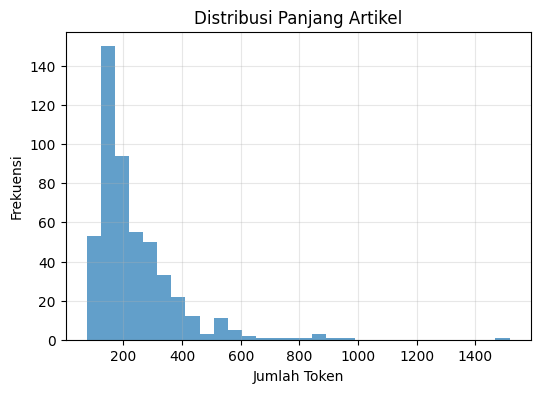


Ringkasan:
  Mean: 31.34, Median: 30.00, Min: 12, Max: 88, Std: 8.02


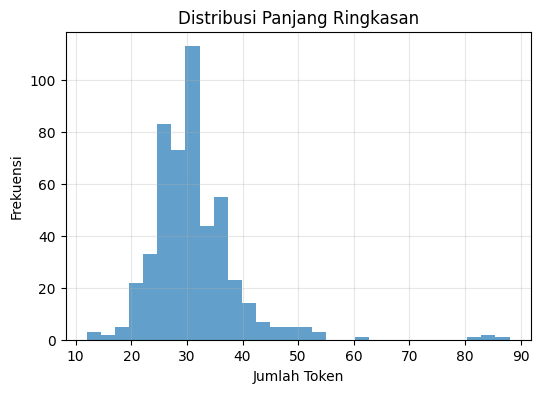


Ringkasan Ekstraktif:
  Mean: 2.29, Median: 2.00, Min: 2, Max: 7, Std: 0.62


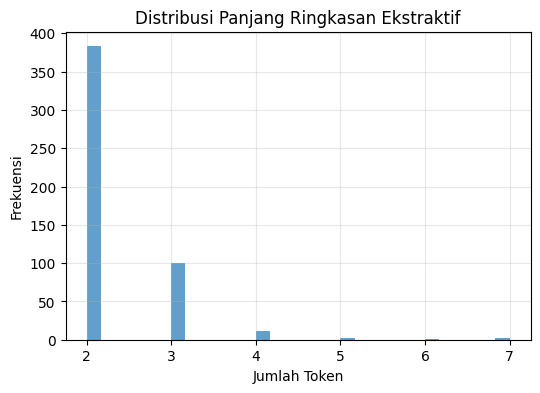


=== Analisis Compression Ratio ===
Mean: 0.1665, Median: 0.1474, Min: 0.0244, Max: 0.8252


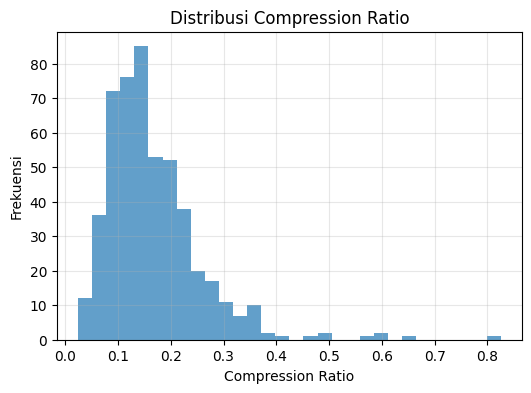


=== Analisis Vocabulary ===

Artikel:
  Vocabulary size: 12,969, Total words: 101,123
  Top 20 Words: yang (2,253), di (2,226), dan (1,743), ini (1,052), itu (894), dengan (791), dari (773), untuk (693), dalam (624), ke (546), tidak (464), jakarta (464), juga (461), akan (459), com (442), liputan6 (435), mereka (398), tak (396), pada (353), warga (330)

Ringkasan:
  Vocabulary size: 4,704, Total words: 13,825
  Top 20 Words: di (360), dan (246), yang (242), ini (100), untuk (97), dari (94), dengan (92), ke (87), dalam (78), akan (69), itu (66), karena (62), tak (58), mereka (58), warga (52), tidak (50), dua (47), para (47), jakarta (45), pada (42)

=== Analisis Novel N-Grams ===


Novel 4-gram Analysis: 100%|██████████| 200/200 [00:01<00:00, 187.39it/s]


Mean: 0.6596, Median: 0.7500


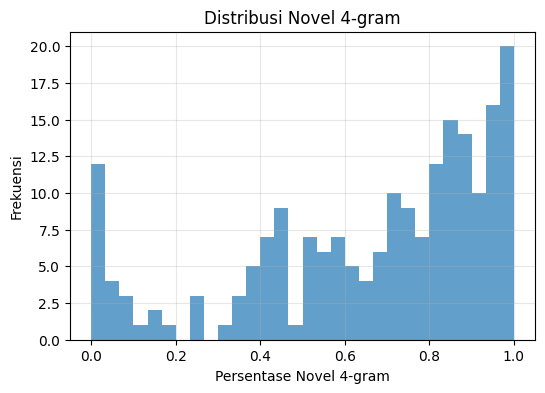

In [24]:
# Analisis dataset
print("\n=== Analisis Dataset ===")
if not dataset or 'train' not in dataset or not dataset['train']:
    print("Dataset tidak tersedia!")
else:
    # Persiapan data
    keys_map = {'article': ['clean_article', 'article'], 'summary': ['clean_summary', 'summary'], 'extractive': ['extractive_summary', 'extractive']}
    train_articles = [extract_text(item, keys_map['article']) for item in tqdm(dataset['train'][:500], desc="Mengolah artikel")]
    train_summaries = [extract_text(item, keys_map['summary']) for item in tqdm(dataset['train'][:500], desc="Mengolah ringkasan")]
    train_extractive = [extract_text(item, keys_map['extractive']) for item in tqdm(dataset['train'][:500], desc="Mengolah ringkasan ekstraktif")]

    # Statistik panjang teks
    print("\n=== Statistik Panjang dari Teks ===")
    length_stats = {
        "Artikel": get_text_lengths(train_articles),
        "Ringkasan": get_text_lengths(train_summaries),
        "Ringkasan Ekstraktif": get_text_lengths(train_extractive)
    }

    for key, lengths in length_stats.items():
        print(f"\n{key}:")
        print(f"  Mean: {np.mean(lengths):.2f}, Median: {np.median(lengths):.2f}, Min: {np.min(lengths)}, Max: {np.max(lengths)}, Std: {np.std(lengths):.2f}")
        plot_histogram(lengths, f"Distribusi Panjang {key}", "Jumlah Token", f"{key.lower().replace(' ', '_')}_distribution.png")

    # Compression Ratio
    print("\n=== Analisis Compression Ratio ===")
    compression_ratios = [s/a for s, a in zip(length_stats['Ringkasan'], length_stats['Artikel']) if a > 0]
    print(f"Mean: {np.mean(compression_ratios):.4f}, Median: {np.median(compression_ratios):.4f}, Min: {np.min(compression_ratios):.4f}, Max: {np.max(compression_ratios):.4f}")
    plot_histogram(compression_ratios, "Distribusi Compression Ratio", "Compression Ratio", "compression_ratio.png")

    # Analisis Kosakata
    print("\n=== Analisis Vocabulary ===")
    article_vocab = analyze_vocabulary(train_articles)
    summary_vocab = analyze_vocabulary(train_summaries)

    for name, vocab in zip(["Artikel", "Ringkasan"], [article_vocab, summary_vocab]):
        print(f"\n{name}:")
        print(f"  Vocabulary size: {vocab['vocab_size']:,}, Total words: {vocab['total_words']:,}")
        print("  Top 20 Words:", ", ".join([f"{w} ({c:,})" for w, c in vocab['top_words']]))

    # Novel N-gram Analysis
    print("\n=== Analisis Novel N-Grams ===")
    novel_4grams = calculate_novel_ngrams(train_articles[:200], train_summaries[:200], n=4)
    print(f"Mean: {np.mean(novel_4grams):.4f}, Median: {np.median(novel_4grams):.4f}")
    plot_histogram(novel_4grams, "Distribusi Novel 4-gram", "Persentase Novel 4-gram", "novel_4grams.png")

In [25]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm import tqdm
from wordcloud import WordCloud

sns.set_palette("pastel")

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text_data, title="Word Cloud"):
    """Membuat WordCloud dari teks."""
    if isinstance(text_data, list):  # Jika input berupa list, gabungkan jadi string
        text_data = " ".join(text_data)

    # Change 'pastel1' to 'Pastel1'
    wordcloud = WordCloud(width=800, height=400, background_color = "white", colormap = "tab10").generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14, fontweight="bold")
    plt.show()

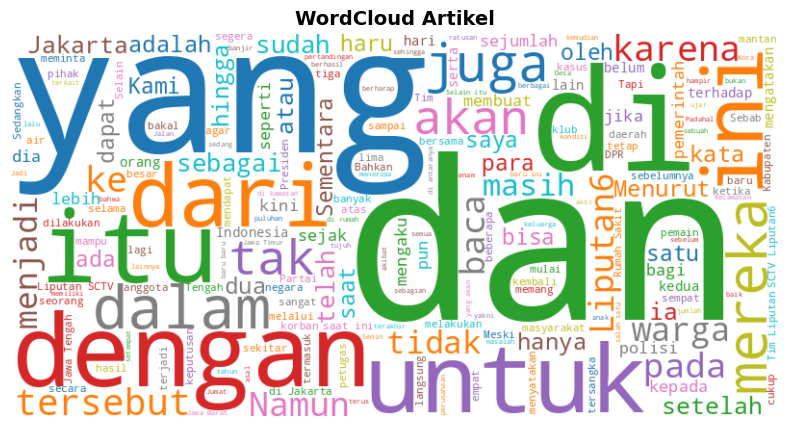

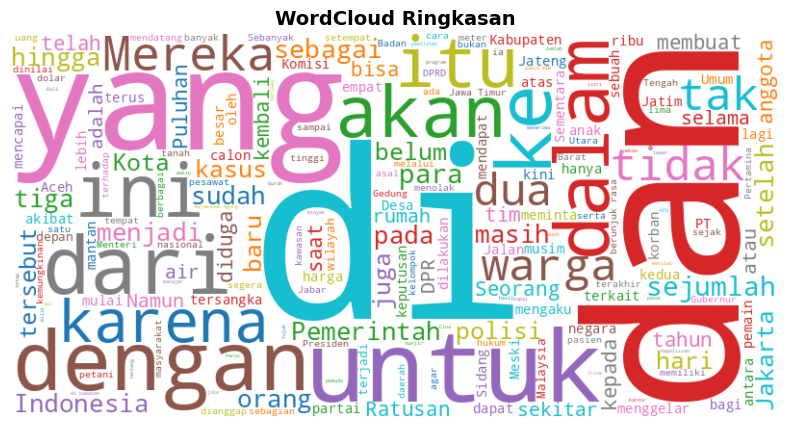

In [27]:
generate_wordcloud(train_articles, title="WordCloud Artikel")
generate_wordcloud(train_summaries, title="WordCloud Ringkasan")

In [28]:
sns.set(style="whitegrid", palette="pastel")  # Set tema warna pastel

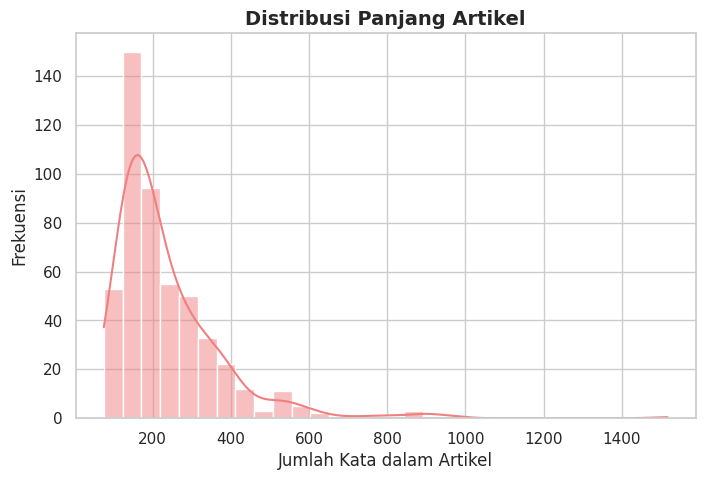

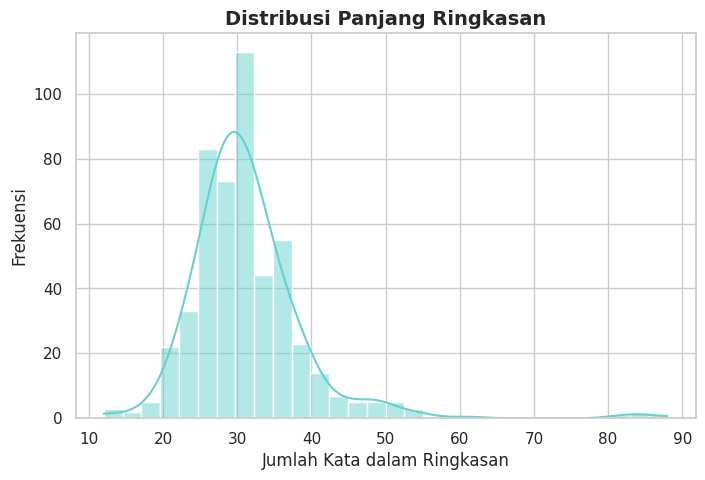

In [29]:
# 📌 1. Distribusi Panjang Artikel & Ringkasan:
def plot_text_length_distribution(texts, title, xlabel, color = "#80CBC4"):
    """Memplot distribusi panjang teks dalam dataset."""
    text_lengths = [len(text.split()) for text in texts]

    plt.figure(figsize = (8, 5))
    sns.histplot(text_lengths, bins=30, kde = True, color = color)
    plt.xlabel(xlabel)
    plt.ylabel("Frekuensi")
    plt.title(title, fontsize=14, fontweight = "bold")
    plt.show()

plot_text_length_distribution(train_articles, "Distribusi Panjang Artikel", "Jumlah Kata dalam Artikel", color = "lightcoral")
plot_text_length_distribution(train_summaries, "Distribusi Panjang Ringkasan", "Jumlah Kata dalam Ringkasan", color = "#66D2CE")

Distribusi panjang teks `(Histogram)`:

Apakah ringkasan cenderung jauh lebih pendek dari artikel?

In [30]:
# 📌 2. Analisis Novel N-Gram:
def calculate_novel_ngrams(articles, summaries, n=4):
    """Menghitung persentase novel N-Grams dalam ringkasan dibandingkan artikel."""
    novel_percentages = []
    for article, summary in tqdm(zip(articles, summaries), total=len(summaries), desc = f"Novel {n}-gram Analysis"):
        article_ngrams = set(tuple(article.split()[i:i+n]) for i in range(len(article.split())-n+1))
        summary_ngrams = set(tuple(summary.split()[i:i+n]) for i in range(len(summary.split())-n+1))
        novel_percentages.append(len(summary_ngrams - article_ngrams) / len(summary_ngrams) if summary_ngrams else 0)

    return novel_percentages

novel_4grams = calculate_novel_ngrams(train_articles[:200], train_summaries[:200], n = 4)

Novel 4-gram Analysis: 100%|██████████| 200/200 [00:00<00:00, 339.66it/s]


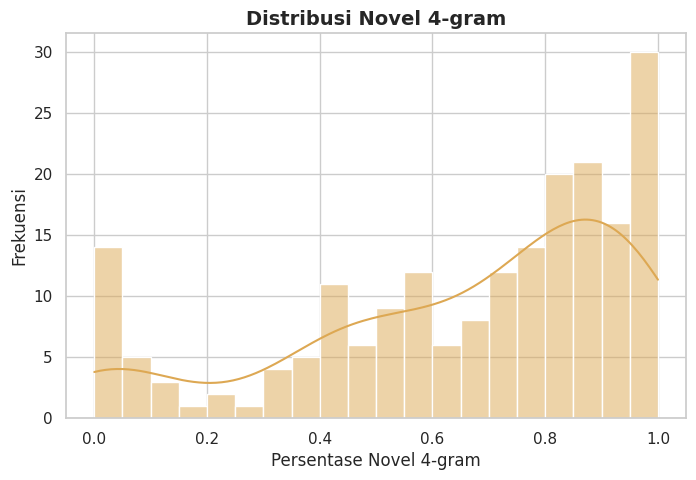


📌 Mean Novel 4-grams: 0.6596
📌 Median Novel 4-grams: 0.7500


In [31]:
# 📌 3. Plot Distribusi Novel N-Gram
def plot_histogram(data, title, xlabel, color = "#B1C29E"):
    """Memplot histogram data Novel N-gram."""
    plt.figure(figsize = (8, 5))
    sns.histplot(data, bins = 20, kde = True, color = color)
    plt.xlabel(xlabel)
    plt.ylabel("Frekuensi")
    plt.title(title, fontsize=14, fontweight = "bold")
    plt.show()

plot_histogram(novel_4grams, "Distribusi Novel 4-gram", "Persentase Novel 4-gram", "#DDA853")

print(f"\n📌 Mean Novel 4-grams: {np.mean(novel_4grams):.4f}")
print(f"📌 Median Novel 4-grams: {np.median(novel_4grams):.4f}")

Analisis Novel `N-gram`:

Seberapa unik ringkasan dibandingkan artikelnya?

## Model Training:

In [32]:
!pip install transformers datasets rouge-score torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 402.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [33]:
!pip install -q evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.5 MB/s eta 0:00:00


In [34]:
import torch
from evaluate import load # Instead of from datasets import load_metric
from datasets import Dataset
from transformers import BartForConditionalGeneration, BartTokenizer, TrainingArguments, Trainer
from torch.utils.data import DataLoader

# Cek apakah GPU tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Menggunakan perangkat:", device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Menggunakan perangkat: cuda


In [35]:
# Konversi ke format dataset
train_data = Dataset.from_dict({"article": train_articles, "summary": train_summaries})

# Load tokenizer dan model BART
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

# Tokenisasi dataset
def preprocess_data(examples):
    inputs = tokenizer(examples["article"], max_length=512, truncation=True, padding="max_length", return_tensors = "pt")
    targets = tokenizer(examples["summary"], max_length=128, truncation=True, padding="max_length", return_tensors = "pt")
    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": targets["input_ids"]
    }

tokenized_dataset = train_data.map(preprocess_data, batched = True)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

### Load Model BART:

In [36]:
# Load model:
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn").to(device)

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

### Konfigurasi Fine-Tuning:

In [37]:
training_args = TrainingArguments(
    output_dir="./results",
    # Either remove evaluation or provide an eval_dataset
    # evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
)

# If you have a validation set, create a Dataset object for it:
# val_data = Dataset.from_dict({"article": val_articles, "summary": val_summaries})
# tokenized_val_dataset = val_data.map(preprocess_data, batched=True)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    # Pass the validation dataset if you have one:
    # eval_dataset=tokenized_val_dataset
)

### Fine-Tuning Model:

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: shaniasalsabilla (shania-salsabilla) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:2758: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


### Evaluasi Model (ROUGE Score):

In [ ]:
rouge = load_metric("rouge")

def evaluate_model(test_texts, reference_summaries):
    model.eval()
    predicted_summaries = []

    for text in test_texts:
        inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True).to(device)
        summary_ids = model.generate(**inputs, max_length=128, min_length=30, length_penalty=2.0, num_beams=4)
        predicted_summaries.append(tokenizer.decode(summary_ids[0], skip_special_tokens=True))

    results = rouge.compute(predictions=predicted_summaries, references=reference_summaries)
    return results

# Evaluasi dengan 100 sample
rouge_scores = evaluate_model(train_articles[:100], train_summaries[:100])
print("ROUGE Scores:", rouge_scores)

### Contoh Hasil Prediksi:

In [ ]:
def summarize_text(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True).to(device)
    summary_ids = model.generate(**inputs, max_length=128, min_length=30, length_penalty=2.0, num_beams=4)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Contoh Artikel dan Hasil Ringkasan
idx = 10
print("\n📌 Artikel Asli:\n", train_articles[idx])
print("\n📌 Ringkasan Asli:\n", train_summaries[idx])
print("\n📌 Ringkasan Model:\n", summarize_text(train_articles[idx]))